In [30]:
import os, cv2, itertools
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline


from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.utils import shuffle

import sklearn
from sklearn.model_selection import train_test_split


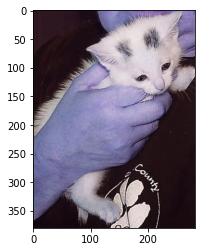

In [31]:
TRAIN_DIR = './training_set/'
class_category = ["cats","dogs"]
for category in class_category:
    path = os.path.join(TRAIN_DIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        , cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
        

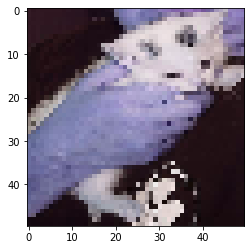

In [32]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [33]:
training_data = []
def create_training_data():
    for category in class_category:  # do dogs and cats

        path = os.path.join(TRAIN_DIR,category)  # create path to dogs and cats
        class_num = class_category.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
create_training_data()


100%|██████████| 4006/4006 [00:03<00:00, 1100.76it/s]


In [34]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
1
0
0
1
0
1


In [35]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [36]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [37]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

In [27]:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)
dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in tf.range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in tf.range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, 
                      y,
                      batch_size=32,
                      epochs=25,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('Cat_vs_Dog-CNN.model')

3-conv-64-nodes-0-dense-1614248109
Epoch 1/25
176/176 [==============================] - 22s 123ms/step - loss: 0.6906 - accuracy: 0.5281 - val_loss: 0.6548 - val_accuracy: 0.6366
Epoch 2/25
176/176 [==============================] - 21s 118ms/step - loss: 0.6447 - accuracy: 0.6424 - val_loss: 0.6154 - val_accuracy: 0.6699
Epoch 3/25
176/176 [==============================] - 24s 134ms/step - loss: 0.6046 - accuracy: 0.6739 - val_loss: 0.5903 - val_accuracy: 0.6848
Epoch 4/25
176/176 [==============================] - 20s 114ms/step - loss: 0.5489 - accuracy: 0.7258 - val_loss: 0.5307 - val_accuracy: 0.7498
Epoch 5/25
176/176 [==============================] - 18s 105ms/step - loss: 0.4996 - accuracy: 0.7626 - val_loss: 0.5488 - val_accuracy: 0.7161
Epoch 6/25
176/176 [==============================] - 18s 104ms/step - loss: 0.4734 - accuracy: 0.7734 - val_loss: 0.5154 - val_accuracy: 0.7490
Epoch 7/25
176/176 [==============================] - 18s 103ms/step - loss: 0.4645 - accuracy:

In [43]:
import cv2
import tensorflow as tf

class_category = ["Cat", "Dog"]


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based

    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model('Cat_vs_Dog-CNN.model')
path = './test_set/cats'
for img in os.listdir(path):
    prediction = model.predict([prepare(os.path.join(path,img))])
    #print(prediction,'\n')  # will be a list in a list.
    print(class_category[int(prediction[0][0])])

Dog
Dog
Cat
Dog
Dog
Dog
Cat
Cat
Cat
Cat
Cat
Dog
Cat
Dog
Dog
Cat
Cat
Dog
Dog
Cat
Dog
Dog
Dog
Dog
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Dog
Cat
Cat
Cat
Dog
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Dog
Dog
Cat
Cat
Cat
Cat
Cat
Cat
Dog
Cat
Cat
Cat
Cat
Cat
Cat
Dog
Cat
Cat
Cat
Dog
Dog
Cat
Dog
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Dog
Cat
Dog
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Dog
Cat
Dog
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Cat
Dog
Cat
Cat
Cat
Cat
Dog
Cat
Dog
Dog
Dog
Cat
Dog
Cat
Cat
Dog
Dog
Dog
Dog
Cat
Cat
Dog
Cat
Cat
Cat
Cat
Dog
Cat
Dog
Dog
Dog
Cat
Dog
Cat
Cat
Cat
Cat
Dog
Cat
Cat
Cat
Cat
Cat
Cat
Dog
Dog
Cat
Dog
Cat
Cat
Dog
Cat
Cat
Cat
Cat
Cat
Cat
Dog
Dog
Cat
Cat
Dog
Cat
Dog
Cat
Cat
Cat
Cat
Cat
Dog
Cat
Cat
Dog
Cat
Cat
Dog
Dog
Dog
Cat
Cat
Cat
Cat
Dog
Cat
Cat
Cat
Dog
Cat
Dog
Cat
Cat
Dog
Dog
Cat
Dog
Cat
Dog
Dog
Cat
Cat
Cat
Dog
Cat
Cat
Dog
Dog
Cat
Cat
Dog
Cat
Dog
Cat
Cat
Cat
Cat
Dog
Dog
Dog
Cat
Cat
Cat
Dog
Dog
Dog
Cat
Dog
Dog
Cat
Dog
Dog
Dog
Cat
Cat
Cat
Cat
Dog
Dog
Dog
Cat
Cat
Dog
Cat
Dog
Dog
Cat
Cat
Cat
Dog


error: OpenCV(4.5.1) /tmp/pip-req-build-jr1ur_cf/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
